In [116]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [210]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [104]:
# Importing of libraries and setting ploting deflaut
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
from pandas_profiling import ProfileReport
%matplotlib inline
from typing import List, Optional
import scipy.stats as stats
from scipy.stats import norm
from pandas._libs.tslibs import nattype
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
# Set Matplotlib defaults
plt.style.use("seaborn-darkgrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def countplot(data, X, col_name):
  sns.set(style="darkgrid")
  plt.figure(figsize=(20,10))
  x = sns.countplot(x=X,data=data, palette = "Set2")
  x.set(xlabel=X, ylabel='Count')
  plt.xticks(rotation=10)
  for p in x.patches: 
    height = p.get_height() 
    x.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(data))*100)+'%',  
      ha="center") 
  plt.title(f"{col_name} distribution")      
  plt.show()
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [117]:
# importing of road traffic accident data
df_accident = pd.read_csv('/content/drive/My Drive/Road Safety Data - Accidents 2019.csv')
df_casualty = pd.read_csv('/content/drive/My Drive/Road Safety Data - Casualties 2019 (1).csv')
df_vehicle = pd.read_csv('/content/drive/My Drive/Road Safety Data- Vehicles 2019.csv')


In [118]:
# merging of accident and casualty data
df_accident_casualty = pd.merge(df_accident, df_casualty, how='inner') 
df_accident_casualty.shape

(128593, 47)

In [119]:
# merging of df_combined_casualty and df_vechile data ON Accident_Index column
df_combined = pd.merge(df_accident_casualty, df_vehicle, how='inner')
df_combined.shape

(109518, 68)

In [9]:
pd.set_option('display.max_columns', None)

In [222]:
df_combined.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,E01004762,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2
2,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,E01004762,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2
3,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,3,21:45,9,E09000022,3,23,2,30,0,-1,-1,0,-1,-1,4,1,1,0,0,1,3,E01003117,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3,9,0,18,-1,0,-1,-1,-1,-1,1,-1,6,2,24,5,-1,-1,-1,3,1,3
4,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,3,01:50,2,E09000007,4,504,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1,E01000943,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1,1,0,4,0,1,0,0,0,0,1,1,1,1,33,6,-1,-1,-1,-1,-1,-1


In [224]:
# df_combined.columns

In [225]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109518 entries, 0 to 109517
Data columns (total 68 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               109518 non-null  object 
 1   Location_Easting_OSGR                        109478 non-null  float64
 2   Location_Northing_OSGR                       109478 non-null  float64
 3   Longitude                                    109478 non-null  float64
 4   Latitude                                     109478 non-null  float64
 5   Police_Force                                 109518 non-null  int64  
 6   Accident_Severity                            109518 non-null  int64  
 7   Number_of_Vehicles                           109518 non-null  int64  
 8   Number_of_Casualties                         109518 non-null  int64  
 9   Date                                         109518 non-nul

In [226]:
profile_df_combined_report = ProfileReport(df_combined, title='Combined Report', html={'style':{'full_width':True}})
# profile_df_combined_report = ProfileReport(df_casualty, title='Combined Report', html={'style':{'full_width':True}})

In [227]:
# import dill as pickle
profile_df_combined_report.to_notebook_iframe()
# pickle.dump_session(<profile_df_combined_report>)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile_df_combined_report.to_file(output_file="Combined_df EDA.html")

**DATA CLEANING**

In [120]:
# Cleaning of locations with nan value

# dataframe containing all location rows with Nan value
location_nan = df_combined[df_combined['Longitude'].isna()]

# grouping of dataframe with police_force
police_grouping = df_combined.groupby('Police_Force')
police_unique = df_combined['Police_Force'].unique()

# collecting of mean of all Latitude, Longtitude, Location_Easting_OSGR,Location_Northing_OSGR into a dictionary based on police force group. 
police_mean_dict={}
for l in police_unique:
  new_value = police_grouping.get_group(l)
  Latitude = new_value['Latitude'].mean()
  Longitude = new_value['Longitude'].mean()
  Location_Easting_OSGR = new_value['Location_Easting_OSGR'].mean()
  Location_Northing_OSGR = new_value['Location_Northing_OSGR'].mean()
  police_mean_dict[l] = [Latitude, Longitude, Location_Easting_OSGR , Location_Northing_OSGR]

In [121]:
# Function to replace Latitude, Longtitude, Location_Easting_OSGR,Location_Northing_OSG Nan values with mean location values of the same police group
def update_nan_locations(df, row, empty):
  for i in row.items():
    for k,j in empty.iterrows():
      if j['Police_Force'] == i[0]:
        df.loc[[k], 'Latitude'], df.loc[[k], 'Longitude'],df.loc[[k], 'Location_Easting_OSGR'], df.loc[[k], 'Location_Northing_OSGR'] = i[1][0], i[1][1], i[1][2], i[1][3]
    

In [122]:
update_nan_locations(df_combined, police_mean_dict, location_nan)

In [132]:
# To verify all nan values for locations have been cleanded
location_nan = df_combined[df_combined['Longitude'].isna()]
len(location_nan)

0

In [133]:
# cleaning of time with nan values

df_combined['NewTime'] = pd.to_datetime(df_combined['Time'])

In [125]:
# dataframe with time nan and without nan
Time_nan = df_combined[df_combined['Time'].isna()]
Time_not_nan = df_combined[df_combined['Time'].notna()]

# grouping of time without nan value with Police force column
police_grouping_ = Time_not_nan.groupby('Police_Force')

In [126]:
# function to replace nan time with mean of time of accident that occurs on the date in the same police group
def time_cleaning(df, police, time_nan):
 
    for k,j in time_nan.iterrows():
      x = j['Police_Force']
      police_group = police.get_group(x)
     
      police_group_and_same_date = police_group[police_group['Date'] == j['Date']]
      y = police_group_and_same_date.NewTime.mean()
      if type(y) == nattype.NaTType:
        x = police_group.NewTime.mean()
        df.loc[[k], 'Time'] = x.strftime('%H:%M')
      else:
        df.loc[[k], 'Time'] = y.strftime('%H:%M')

In [127]:
time_cleaning(df_combined, police_grouping_, Time_nan)

In [128]:
# To verify all nan values for Time have been cleanded
Time_nan = df_combined[df_combined['Time'].isna()]
len(Time_nan)

0

**Solution A**

In [134]:
# function to get hour of accidence oocurence
def hour(string):
    s=string[0:2]
    return int(s)
df_combined['Hour'] = df_combined['Time'].apply(lambda x: hour(x))


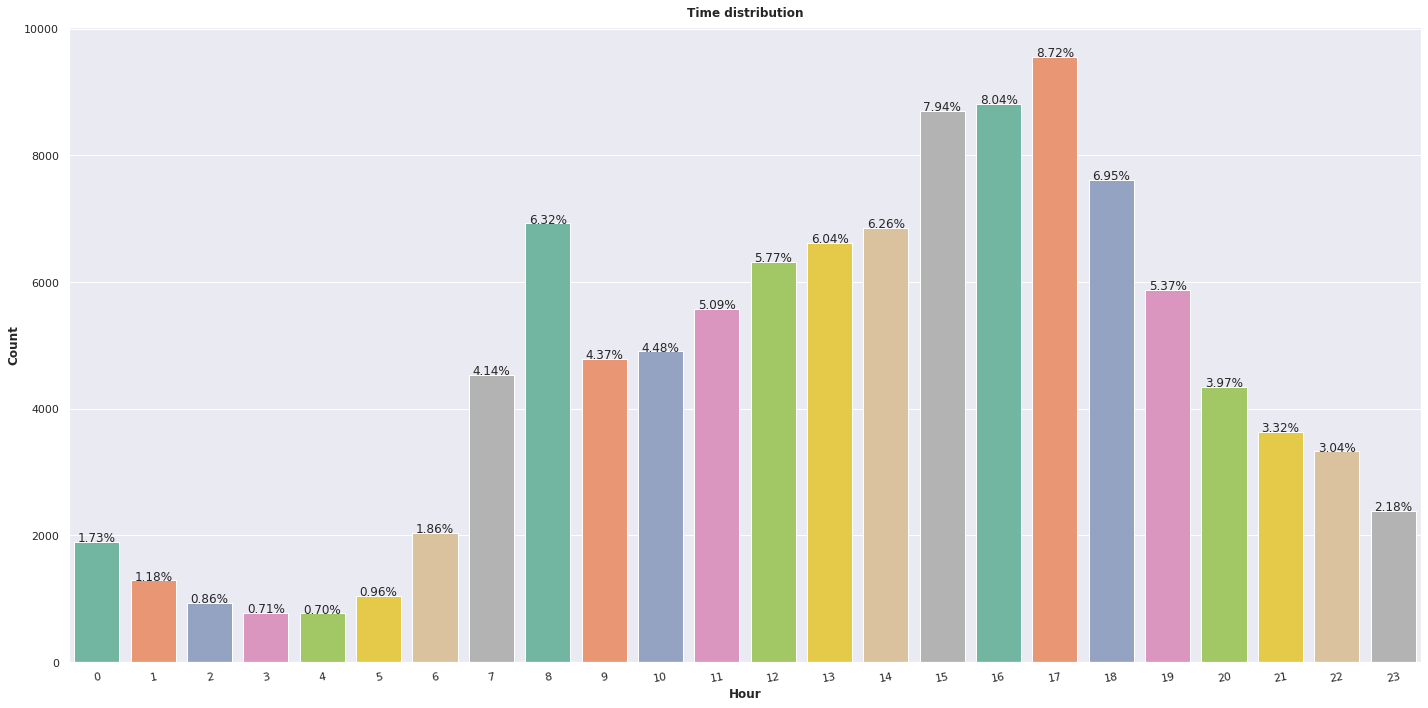

In [135]:
#Plotting time variation with countplot
countplot(df_combined, 'Hour', 'Time')

In [136]:
# function to assign numbers to days of week
def day(day):
    if day == 1:
      return 'Sunday'
    elif day == 2:
      return 'Monday'
    elif day == 3:
        return 'Tuesday'
    elif day == 4:
        return 'Wednesday'
    elif day == 5:
      return 'Thursday'
    elif day == 6:
      return 'Friday'
    else:
      return 'Saturday'
df_combined['Day']= df_combined['Day_of_Week'].apply(lambda x: day(x))

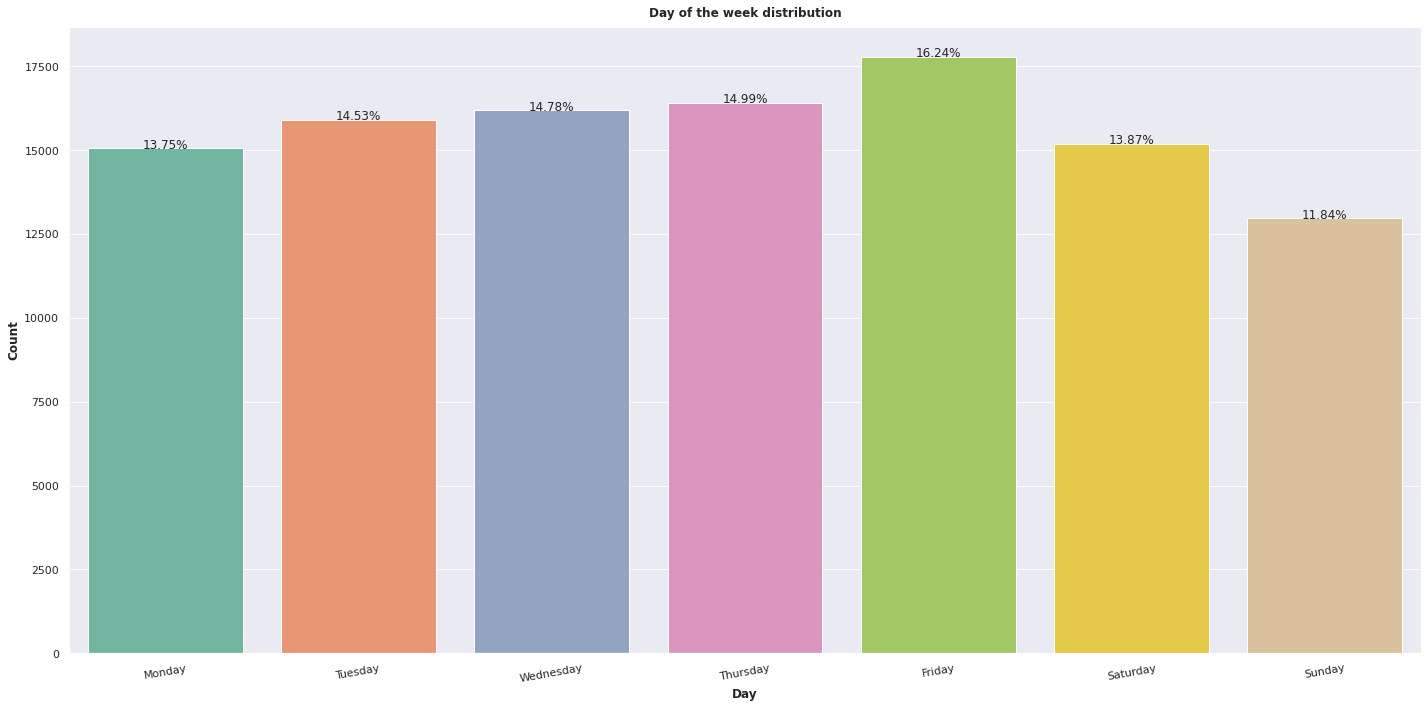

In [137]:
# Plotting of number of accidents in a week days
countplot(df_combined, 'Day', 'Day of the week')

**QUESTION B**

In [138]:
def vechile_grouping(vechile_type):
    if vechile_type == 2:
      return 'MotorCycle'
    elif vechile_type == 3:
      return 'MotorCycle'
    elif vechile_type == 4:
      return 'MotorCycle'
    elif vechile_type == 5:
      return 'MotorCycle'
    elif vechile_type == 22:
      return 'MotorCycle'
    elif vechile_type == 23:
      return 'MotorCycle'
    elif vechile_type == 97:
      return 'MotorCycle'
    else:
      return 'Others'
df_combined['Vehicle_classification']= df_combined['Vehicle_Type'].apply(lambda x: vechile_grouping(x))

In [139]:
# Building dataframe containing all motorcycle rows
df_combined_motorcycle_ = df_combined[df_combined['Vehicle_classification'] == 'MotorCycle']

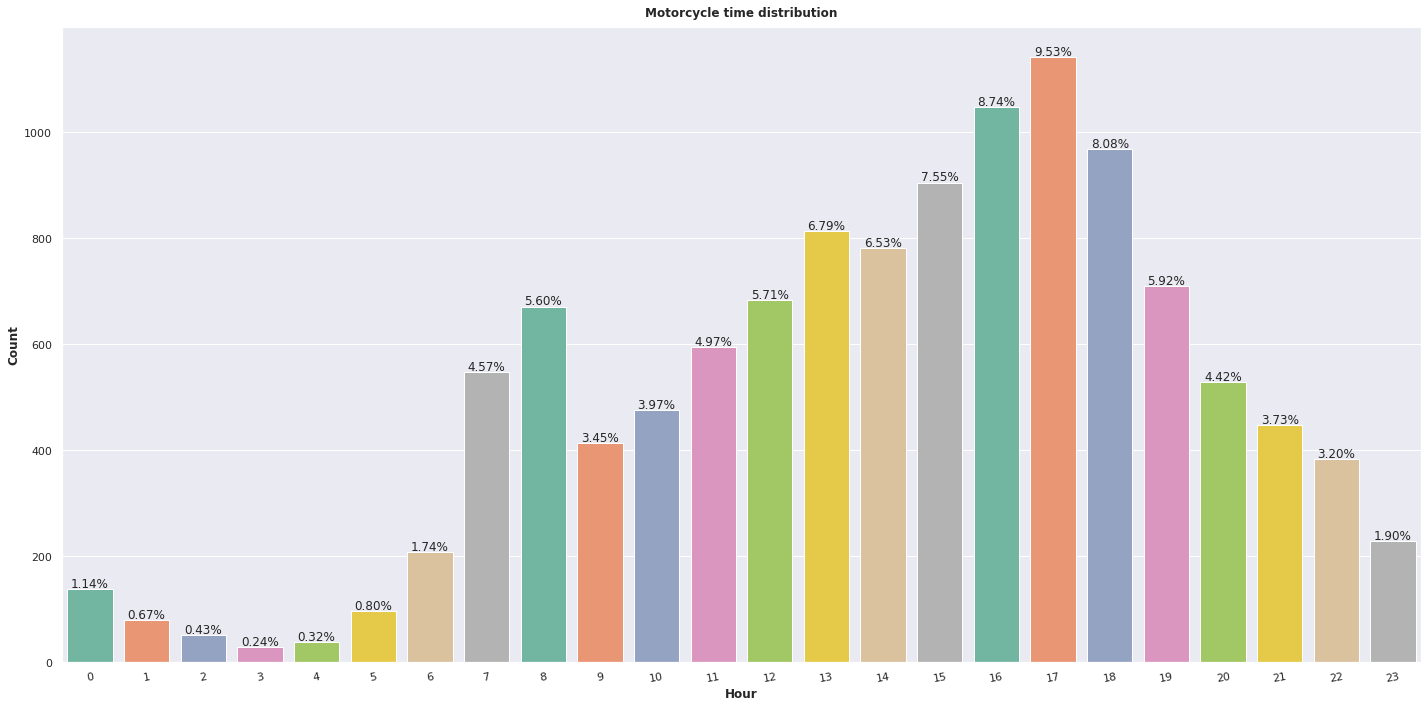

In [140]:
# Plotting of number of accidents experienced with motorcycles in 24 hours
countplot(df_combined_motorcycle_, 'Hour', 'Motorcycle time')

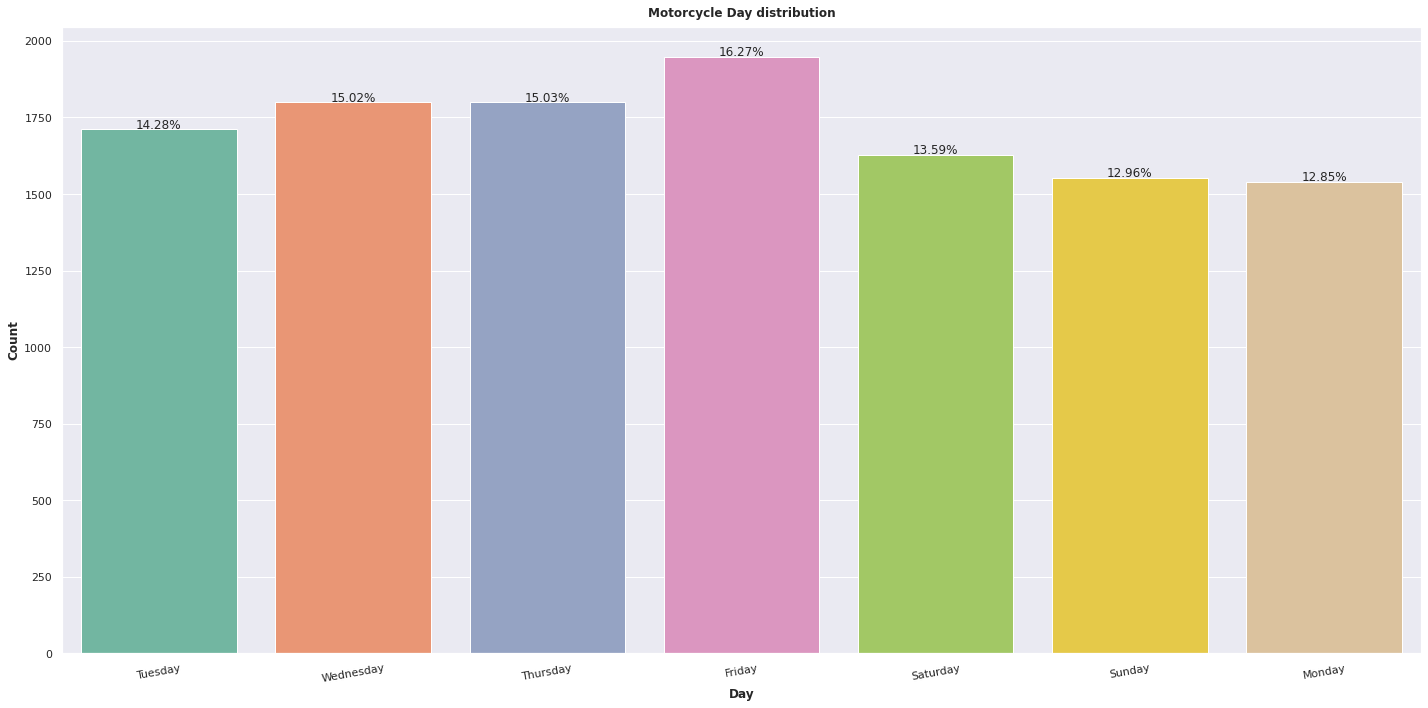

In [141]:
# Plotting of number of accidents experienced with motorcycles in days of the week
countplot(df_combined_motorcycle_, 'Day', 'Motorcycle Day')

**QUESTION C**

In [142]:
# Dataframe containing only pedestrain rows
df_combined_pedestrian= df_combined[df_combined['Casualty_Class'] == 3]


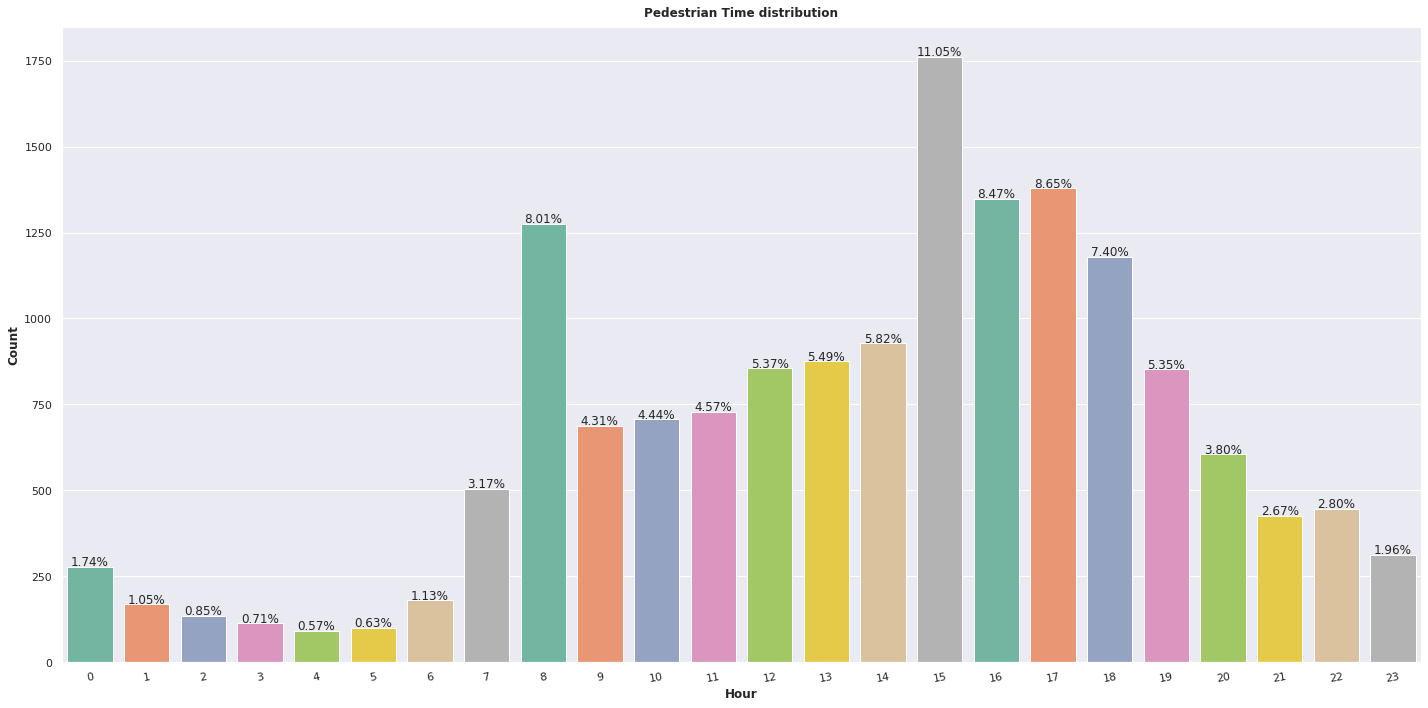

In [143]:
# Plotting of number of accidents experienced with motorcycles in 24 hours
countplot(df_combined_pedestrian, 'Hour', 'Pedestrian Time')

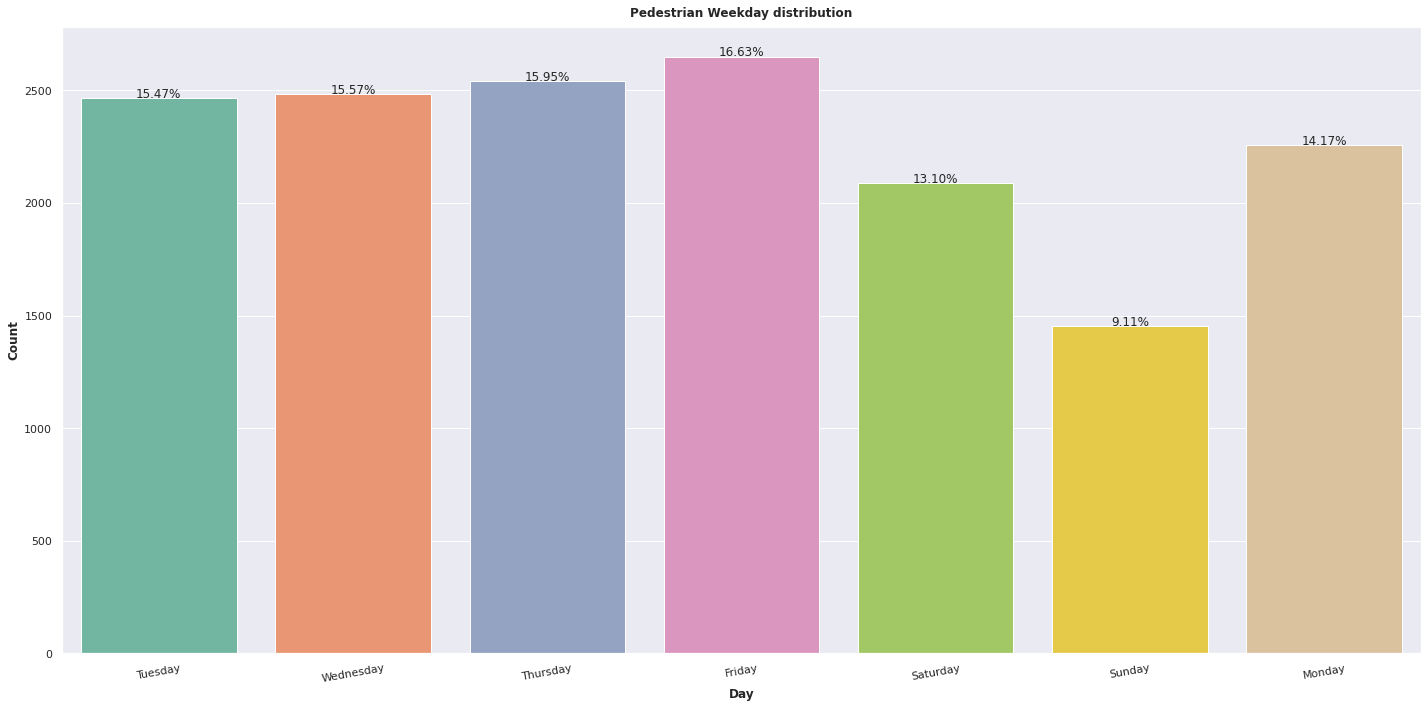

In [144]:
countplot(df_combined_pedestrian, 'Day', 'Pedestrian Weekday')

**QUESTION D**

In [145]:
df_combined['Date'] = pd.to_datetime(df_combined['Date'], format='%d/%m/%Y')


In [146]:
# 

# creating a dictionary containing a date
dict = {'Date':["2019-03-31", '2019-10-27']}
  
# converting the dictionary to a dataframe
df = pd.DataFrame.from_dict(dict)
  
# converting the date to the required format
df['Date'] = pd.to_datetime(df['Date'], errors ='coerce')
df.astype('int64').dtypes
  
# extracting the week from the date
weekNumber = df['Date'].dt.week
  
daylight_saving_start = weekNumber.iloc[0]
daylight_saving_end = weekNumber.iloc[1]


In [33]:
# df_combined.week = pd.to_numeric(df_combined.Week)
week_daylight_start = df_combined[(df_combined['Date'].between('2019-03-31','2019-04-07'))].describe()['Number_of_Casualties']
week_daylight_ends = df_combined[(df_combined['Date'].between('2019-10-27','2019-11-03'))].describe()['Number_of_Casualties']
print(np.var(week_daylight_start), np.var(week_daylight_ends))
ratio_check = np.var(week_daylight_start)/np.var(week_daylight_ends)

print(ratio_check)
#Obviously, the ratio is less than 4:1, thus the variances are considered to be equal.
print(stats.ttest_ind(a=week_daylight_start, b=week_daylight_ends, equal_var=True))
# Declearing our hypothesis:
#  H0: The mean of both samples (week_daylight_start and week_daylight_ends) are equal.
#  H1: The mean of both samples (week_daylight_start and week_daylight_ends) are not equal.


638294.406011009 496009.5999449202
1.2868589762816867
Ttest_indResult(statistic=0.0857906613928202, pvalue=0.9328476873900624)


In [315]:
# Since my p-value (p=0.9366193661554156) is greater than alpha = 0.05. I will be accepting the Null hypothesis(H0). This implies that our mean is equal. 

In [147]:
# Converting dates to week in the year
df_combined['Week_of_year'] = df_combined['Date'].dt.weekofyear
week_of_year = []
year_weeks = range(1,53)
weekly_accident_count =[]
for i in year_weeks:
  x = df_combined[df_combined['Week_of_year'] == i]
  y =len(x)
  weekly_accident_count.append(y)

for i in year_weeks:
  week_of_year.append(i)

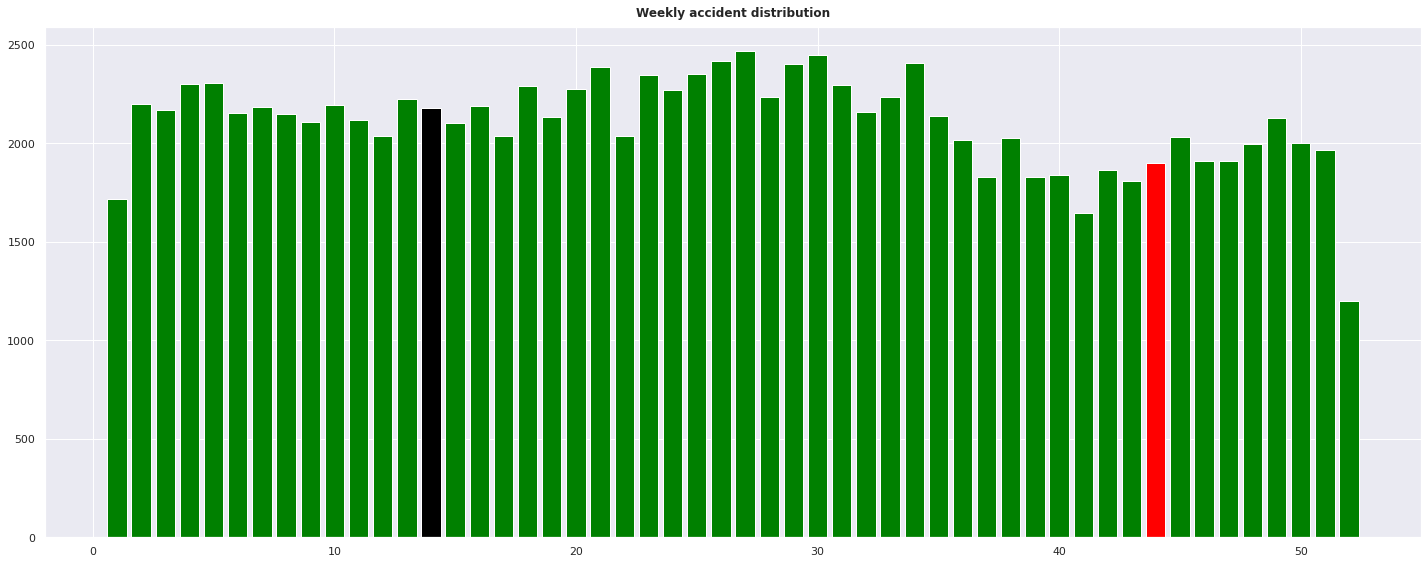

In [35]:
# Weekly accident count
plt.figure(figsize=(20,8))
c = ['black' if x == daylight_saving_start else 'red' if x == daylight_saving_end  else "green" for x in range(52)]
a =plt.bar(week_of_year, height = weekly_accident_count, color = c)
plt.title("Weekly accident distribution")
plt.show()

**E**

In [36]:
#  Importing https://www.sunrise-and-sunset.com/en/sun/russia/uk/2019 containing uk record of 2019 daily accident.
df_sunsine = pd.read_csv('/content/drive/My Drive/sunrisesunset.csv')

In [37]:
# Preparing sunset dataframe for merging
day_length_df = df_sunsine.reset_index().drop(['index'],1)
day_length_df['Date'] = pd.to_datetime(day_length_df['Date'])

In [148]:
# Merging of combined data frame and Sunrise, Sunset dataframe
df = df_combined.merge(day_length_df, on='Date', how='left')

df = df_combined.merge(day_length_df, on='Date', how='left')
time = pd.DatetimeIndex(df['Sunrise'])
df['decimal_time_sunrise'] = time.hour + time.minute/60
time = pd.DatetimeIndex(df['Sunset'])
df['decimal_time_sunset'] = time.hour + time.minute/60
time = pd.DatetimeIndex(df['Day length'])
df['decimal_hours_length'] = time.hour + time.minute/60

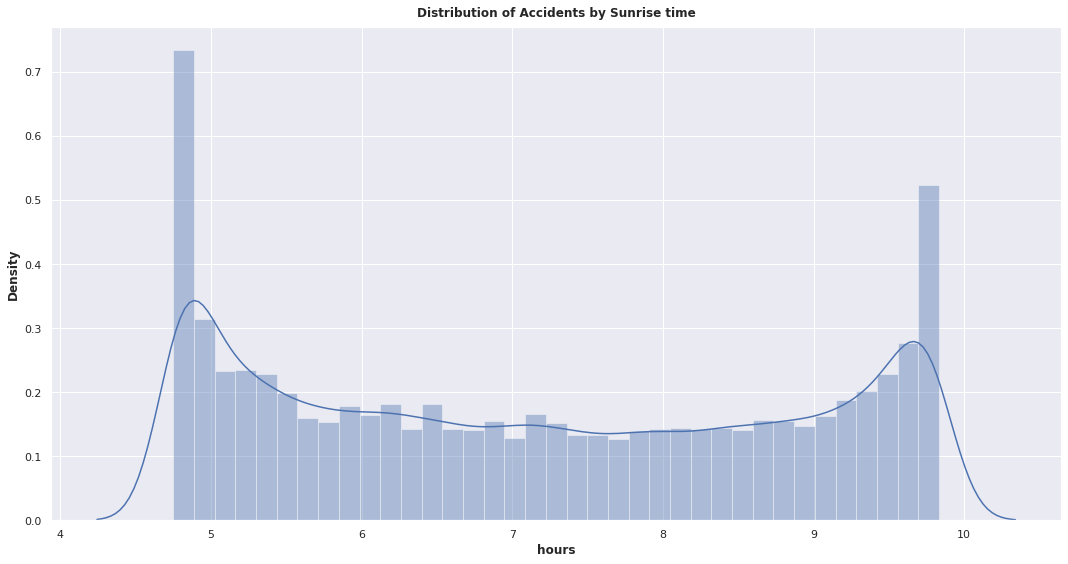

In [39]:
#  Plotting Sunrise count
fig = plt.figure(figsize=(15,8))
ax = sns.distplot(df['decimal_time_sunrise'])
ax.set(xlabel='hours', ylabel='Density', title='Distribution of Accidents by Sunrise time')
plt.show()

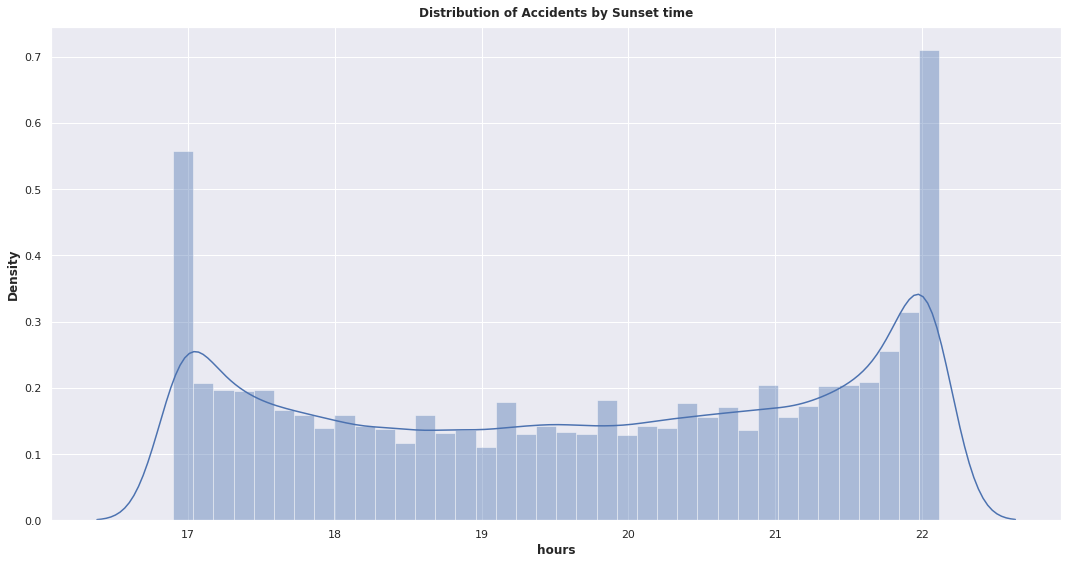

In [40]:
#  Plotting Sunset count
fig = plt.figure(figsize=(15,8))
ax = sns.distplot(df['decimal_time_sunset'])
ax.set(xlabel='hours', ylabel='Density', title='Distribution of Accidents by Sunset time')
plt.show()

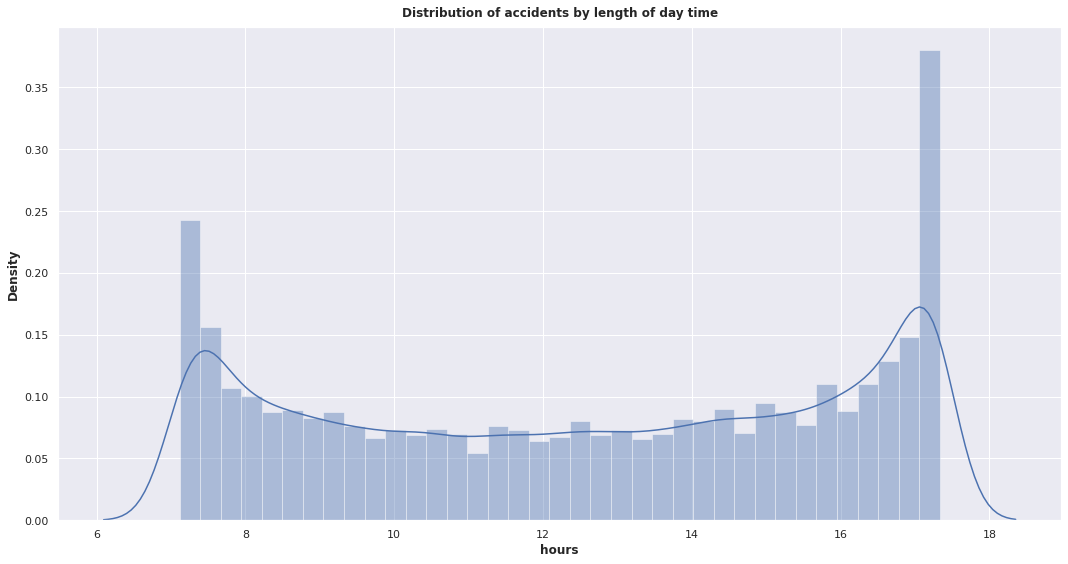

In [41]:
#  Plotting hour length count
fig = plt.figure(figsize=(15,8))
ax = sns.distplot(df['decimal_hours_length'])
ax.set(xlabel='hours', ylabel='Density', title='Distribution of accidents by length of day time')
plt.show()

In [42]:
df['hours_length'] = df['decimal_hours_length'].astype(int)
df = df.groupby("hours_length").agg(no_of_accidents=pd.NamedAgg(column='Accident_Index', aggfunc='count')).reset_index()

In [43]:
data1 = list(df['hours_length'])
data2 = list(df['no_of_accidents'])
print(data1)

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [44]:
import random
# seed random number generator
random.seed(1)
# calculate spearman's correlation
coef, p = stats.spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.136
Samples are uncorrelated (fail to reject H0) p=0.689


**F**

In [149]:
# Grouping of engine capacity
def engine_capacity_mean(engine_capacity):
    if engine_capacity > -1 and engine_capacity <= 2000:
      return 'Between (0 - 2000)cc'
    elif engine_capacity > 2000 and engine_capacity <= 4000:
      return 'Between (2001 - 4000)cc'
    elif engine_capacity > 4000 and engine_capacity <= 6000:
        return 'Between (4001 - 6000)cc'
    elif engine_capacity > 6000 and engine_capacity <= 8000:
        return 'Between (6001 - 8000)cc'
    elif engine_capacity > 8000 and engine_capacity <= 10000:
      return 'Between (8001 - 10000)cc'
    elif engine_capacity > 10000 and engine_capacity <= 12000:
      return 'Between (10001 - 12000)cc'
    elif engine_capacity > 12000 and engine_capacity <= 14000:
      return 'Between (12001 - 14000)cc'
    elif engine_capacity > 14000 and engine_capacity <= 16000:
      return 'Between (14001 - 16000)cc'
    elif engine_capacity > 16000 and engine_capacity <= 18000:
      return 'Between (16001 - 18000)cc' 
    elif engine_capacity > 18000 and engine_capacity <= 20000:
      return 'Between (18001 - 20000)cc' 
    elif engine_capacity > 20000 and engine_capacity <= 22000:
      return 'Between (20001 - 22000)cc' 
    elif engine_capacity > 22000 and engine_capacity <= 24000:
      return 'Between (22001 - 24000)cc' 
    elif engine_capacity > 24000 and engine_capacity <= 26000:
      return 'Between (24000 - 26000)cc'
    elif engine_capacity > 26000 and engine_capacity <= 28000:
      return 'Between (26000 - 28000)cc'
    else:
      return 'Between (28000 - 30000)cc'


In [150]:
#  A new column containing engine grouping
df_combined['engine_capacity_grouping']=df_combined['Engine_Capacity_(CC)'].apply(lambda x: engine_capacity_mean(x))

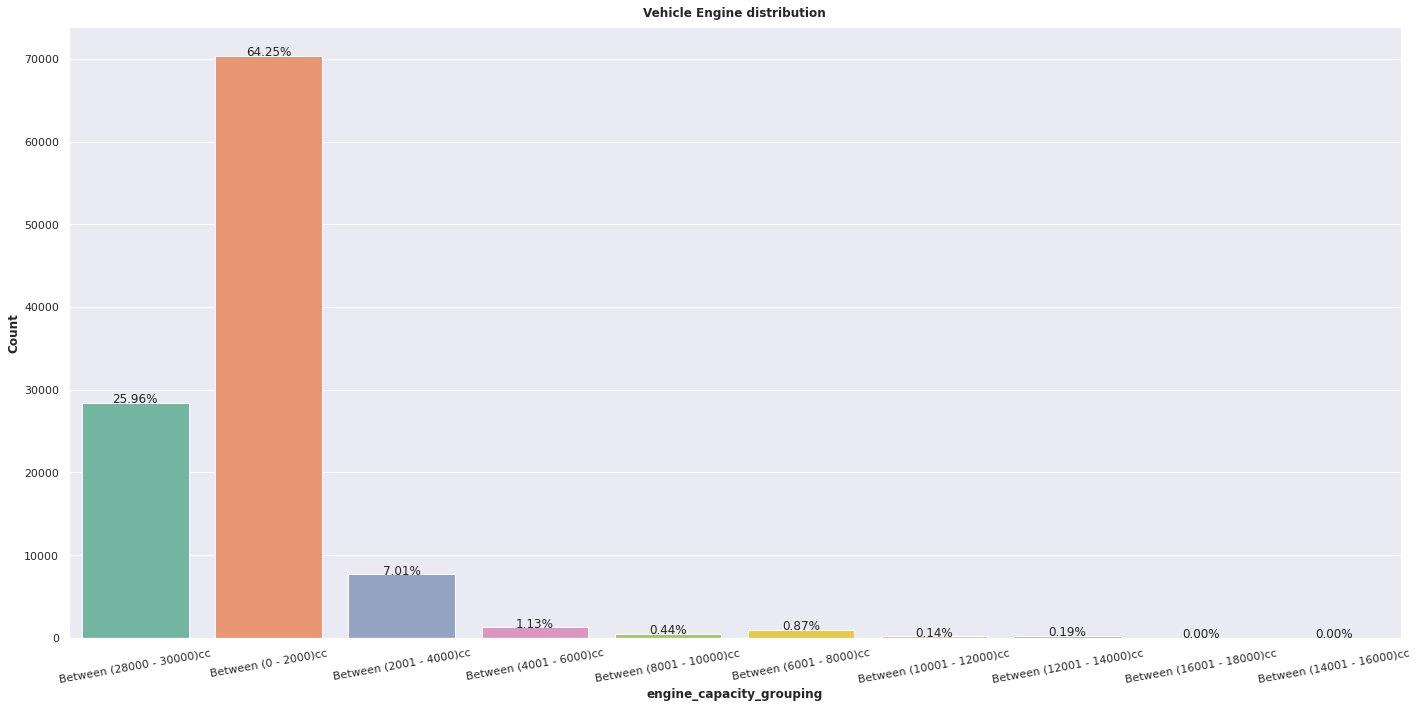

In [151]:
# Engine grouping plot
countplot(df_combined, 'engine_capacity_grouping', 'Vehicle Engine')

In [330]:
# Sum of each engine group
df_combined['engine_capacity_grouping'].value_counts()

Between (0 - 2000)cc         70365
Between (28000 - 30000)cc    28435
Between (2001 - 4000)cc       7677
Between (4001 - 6000)cc       1238
Between (6001 - 8000)cc        954
Between (8001 - 10000)cc       479
Between (12001 - 14000)cc      210
Between (10001 - 12000)cc      154
Between (14001 - 16000)cc        5
Between (16001 - 18000)cc        1
Name: engine_capacity_grouping, dtype: int64

In [331]:
# EDA on Vechile hand drive

# Finding mode of Vechile hand drive
df_combined['Was_Vehicle_Left_Hand_Drive?'].mode()

0    1
dtype: int64

In [152]:
# Repling unknown with, was not left hand drive
df_combined['Was_Vehicle_Left_Hand_Drive?'] = df_combined['Was_Vehicle_Left_Hand_Drive?'].replace(-1,1)

In [54]:
# Function to replace number to main meaning.
def Vechile_hand(vehicle_drive):
    if vehicle_drive == 1:
      return 'Was not left Drive'
    else:
        return 'Was left drive'

In [153]:
df_combined['Hand_drive']=df_combined['Was_Vehicle_Left_Hand_Drive?'].apply(lambda x: Vechile_hand(x))

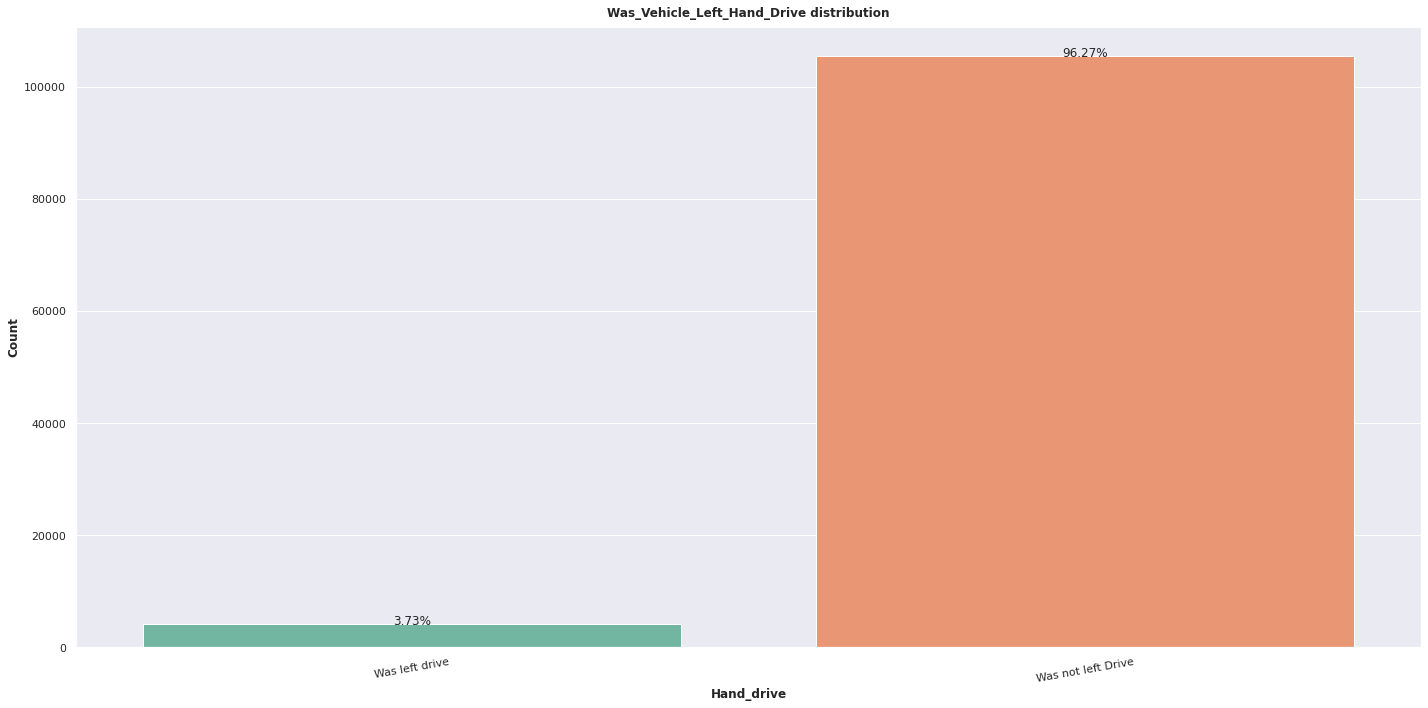

In [56]:
# Plotting of hand drive
countplot(df_combined, 'Hand_drive', 'Was_Vehicle_Left_Hand_Drive')

In [154]:
# Function to group vehicles into diffrent groups
def vechile_age_classification(age):
    if age > -1 and age <= 5:
      return 'Age 1 - 5'
    elif age > 5 and age <= 10:
      return 'Age 6 - 10'
    elif age > 10 and age <= 15:
        return 'Age 11 - 15'
    elif age > 15 and age <= 20:
        return 'Age 16 - 20'
    elif age > 20 and age <= 25:
      return 'Age 21 - 25'
    elif age > 25 and age <= 30:
      return 'Age 26 - 30'
    elif age > 30 and age <= 35:
      return 'Age 31 - 35'
    elif age > 35 and age <= 40:
      return 'Age 36 - 40'
    elif age > 40 and age <= 45:
      return 'Age 41 - 45' 
    elif age > 45 and age <= 50:
      return 'Age 46 - 50' 
    elif age > 50 and age <= 55:
      return 'Age 51 - 55' 
    elif age > 55 and age <= 60:
      return 'Age 56 - 60' 
    elif age > 60 and age <= 65:
      return 'Age 61 - 65' 
    elif age > 65 and age <= 70:
      return 'Age 66 - 70' 
    elif age > 70 and age <= 75:
      return 'Age 71 - 75'
    elif age > 75 and age <= 80:
      return 'Age 76 - 80'
    elif age > 80 and age <= 85:
      return 'Age 81 - 85' 
    elif age > 85 and age <= 90:
      return 'Age 86 - 90' 
    elif age > 90 and age <= 95:
      return 'Age 91 - 95'
    elif age > 95 and age <= 100:
      return 'Age 96 - 100'
    else:
      return 'Unknown'
df_combined['Vehicle_age_classification']=df_combined['Age_of_Vehicle'].apply(lambda x: vechile_age_classification(x))

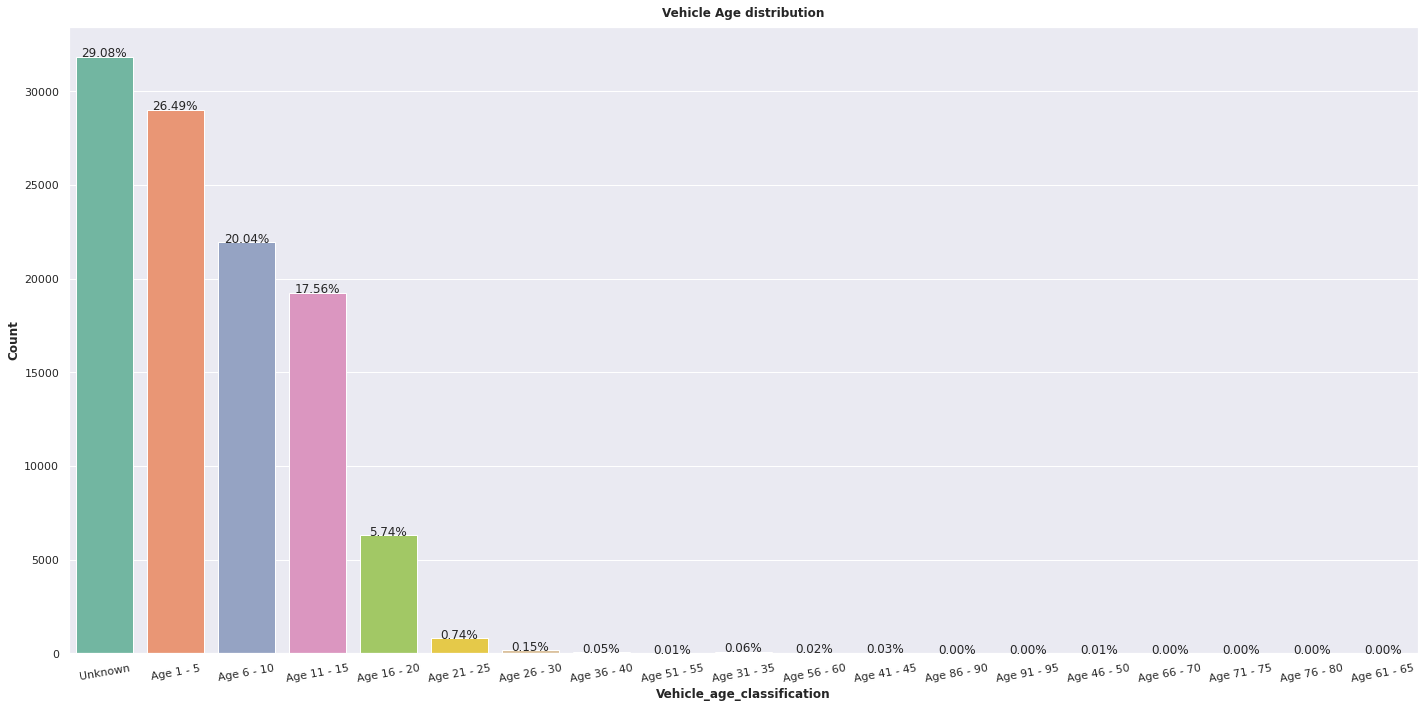

In [49]:
# Vechile age grouping plots
countplot(df_combined, 'Vehicle_age_classification', 'Vehicle Age')

In [338]:
# Vechile age grouping unique count
df_combined['Vehicle_age_classification'].value_counts()

Unknown        31850
Age 1 - 5      29007
Age 6 - 10     21948
Age 11 - 15    19232
Age 16 - 20     6291
Age 21 - 25      814
Age 26 - 30      168
Age 31 - 35       71
Age 36 - 40       60
Age 41 - 45       28
Age 56 - 60       17
Age 51 - 55       12
Age 46 - 50        7
Age 86 - 90        5
Age 66 - 70        3
Age 61 - 65        2
Age 91 - 95        1
Age 71 - 75        1
Age 76 - 80        1
Name: Vehicle_age_classification, dtype: int64

**G**


In [155]:
#  Function to change weather value to real meaning
def Weather_state(weather):
    if weather == 1 :
      return 'Fine'
    elif weather == 2:
      return 'Raining'
    elif weather == 3:
        return 'Snowing'
    elif weather == 4:
        return 'Fine/winds'
    elif weather == 5:
      return 'Raining/winds'
    elif weather == 6:
      return 'Snowing/winds'
    elif weather == 7:
      return 'Fog'
    elif weather == 8:
      return 'Other'
    else:
      return 'Unknown'


df_combined['Weather_state']=df_combined['Weather_Conditions'].apply(lambda x:  Weather_state(x))

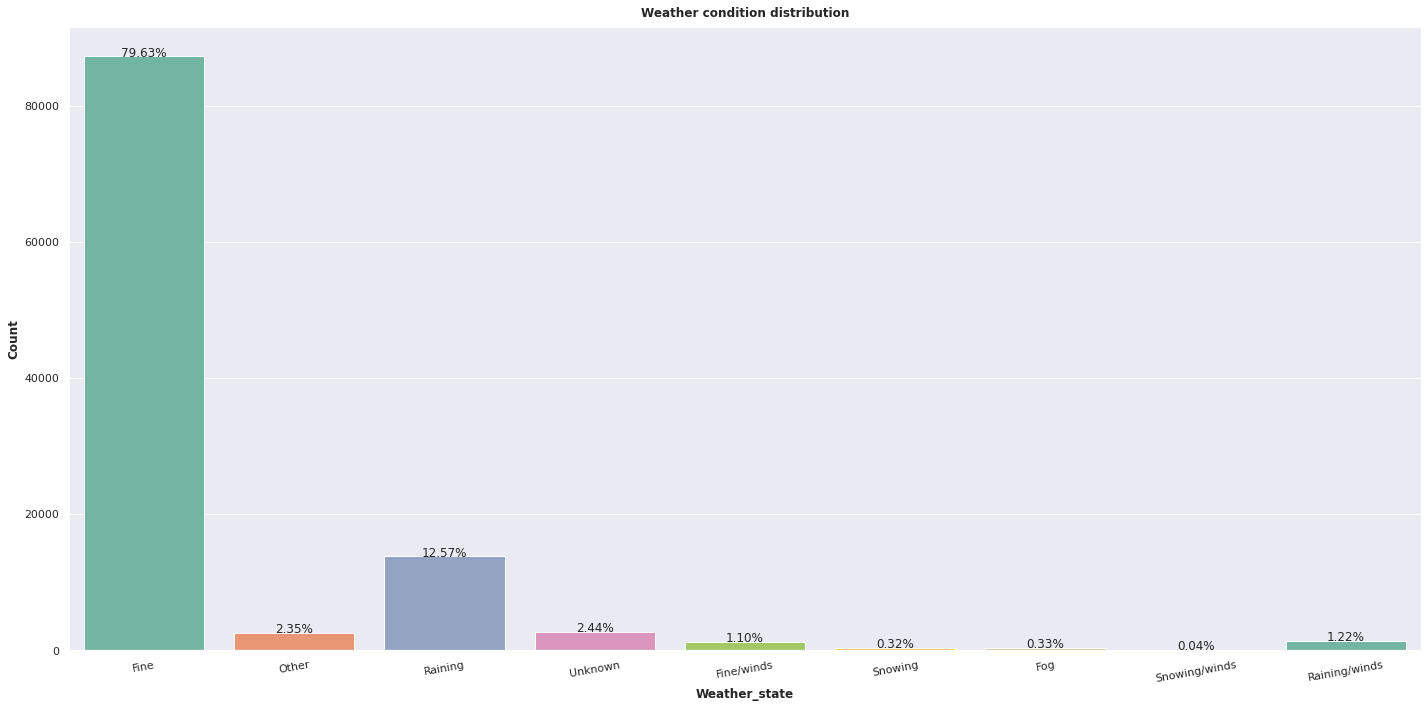

In [340]:
# Plotting weather Condition
countplot(df_combined, 'Weather_state', 'Weather condition')

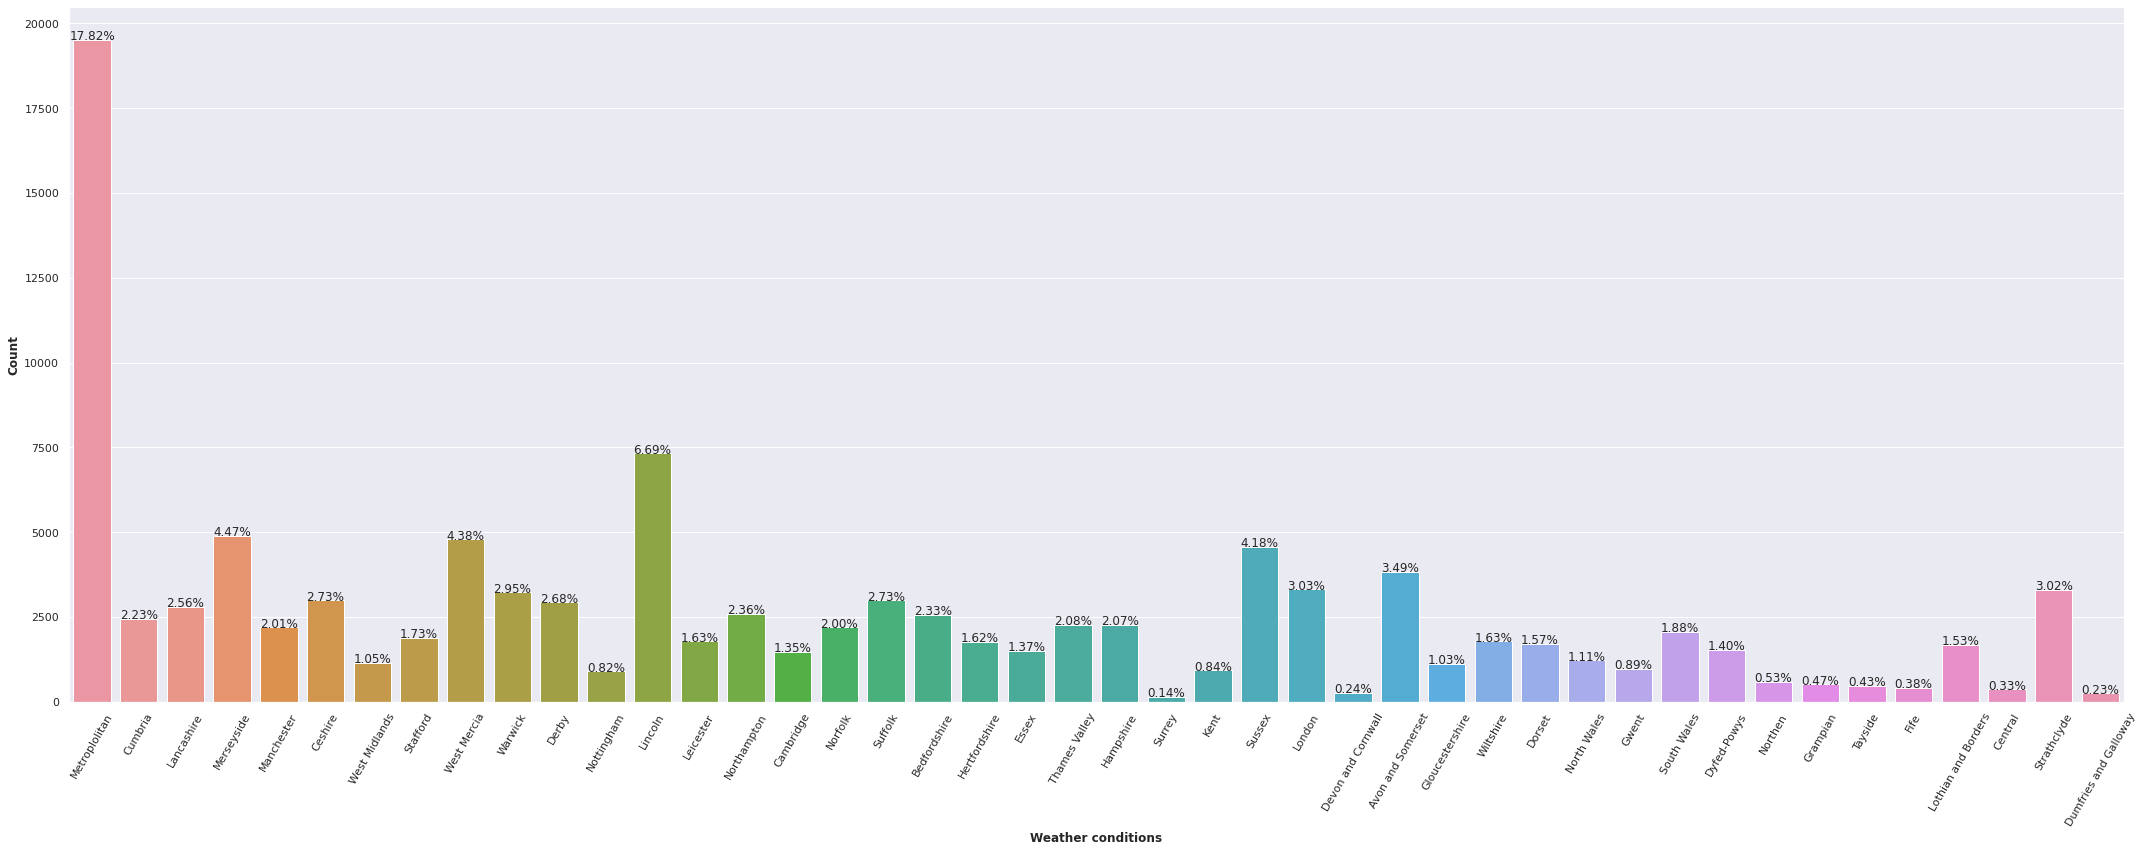

In [51]:
# Plotting geographical location plot
sns.set(style="darkgrid")
plt.figure(figsize=(30,12))
weatherplot = sns.countplot(x='Police_Force',data=df_combined)
weatherplot.set(xlabel='Weather conditions', ylabel='Count',xticklabels=['Metroplolitan','Cumbria','Lancashire','Merseyside','Manchester','Ceshire','West Midlands','Stafford','West Mercia', 'Warwick', 'Derby', 'Nottingham', 
                                                                         'Lincoln', 'Leicester', 'Northampton', 'Cambridge', 'Norfolk', 'Suffolk', 'Bedfordshire', 'Hertfordshire', 'Essex', 'Thames Valley', 'Hampshire', 'Surrey', 
                                                                         'Kent', 'Sussex', 'London', 'Devon and Cornwall', 'Avon and Somerset', 'Gloucestershire', 'Wiltshire', 'Dorset','North Wales', 'Gwent', 'South Wales', 
                                                                         'Dyfed-Powys', 'Northen', 'Grampian', 'Tayside', 'Fife', 'Lothian and Borders', 'Central', 'Strathclyde', 'Dumfries and Galloway'])
plt.xticks(rotation=60)
for p in weatherplot.patches: 
    height = p.get_height() 
    weatherplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(df_combined))*100)+'%',  
      ha="center") 
plt.show()

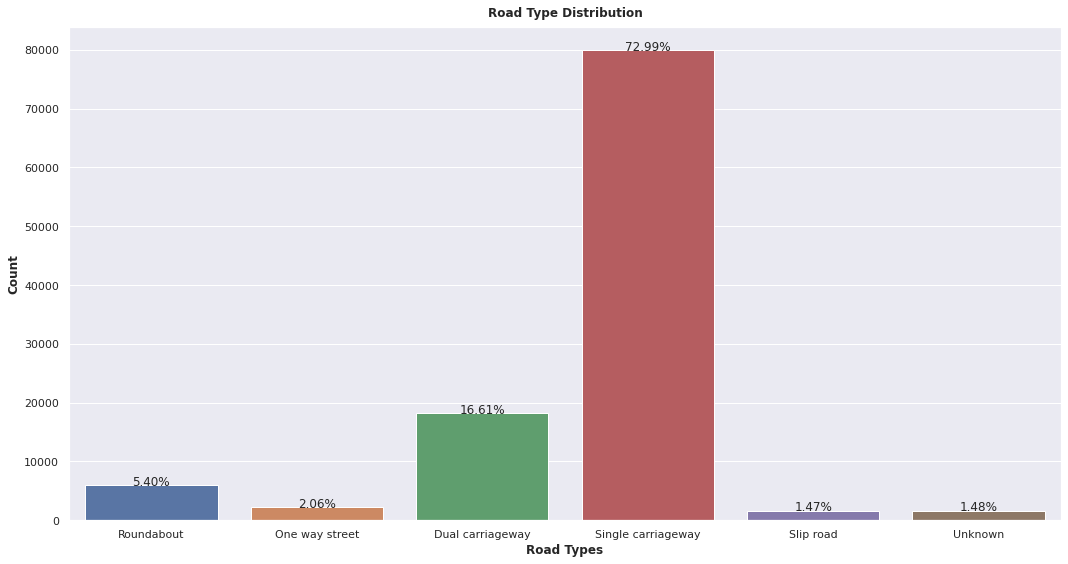

In [342]:
# Road type Plot
acc_time = df_combined
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
weatherplot = sns.countplot(x='Road_Type',data=df_combined)
weatherplot.set(xlabel='Road Types', ylabel='Count', xticklabels=['Roundabout','One way street','Dual carriageway','Single carriageway','Slip road','Unknown'])
for p in weatherplot.patches: 
    height = p.get_height() 
    weatherplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
plt.title('Road Type Distribution')
plt.show()

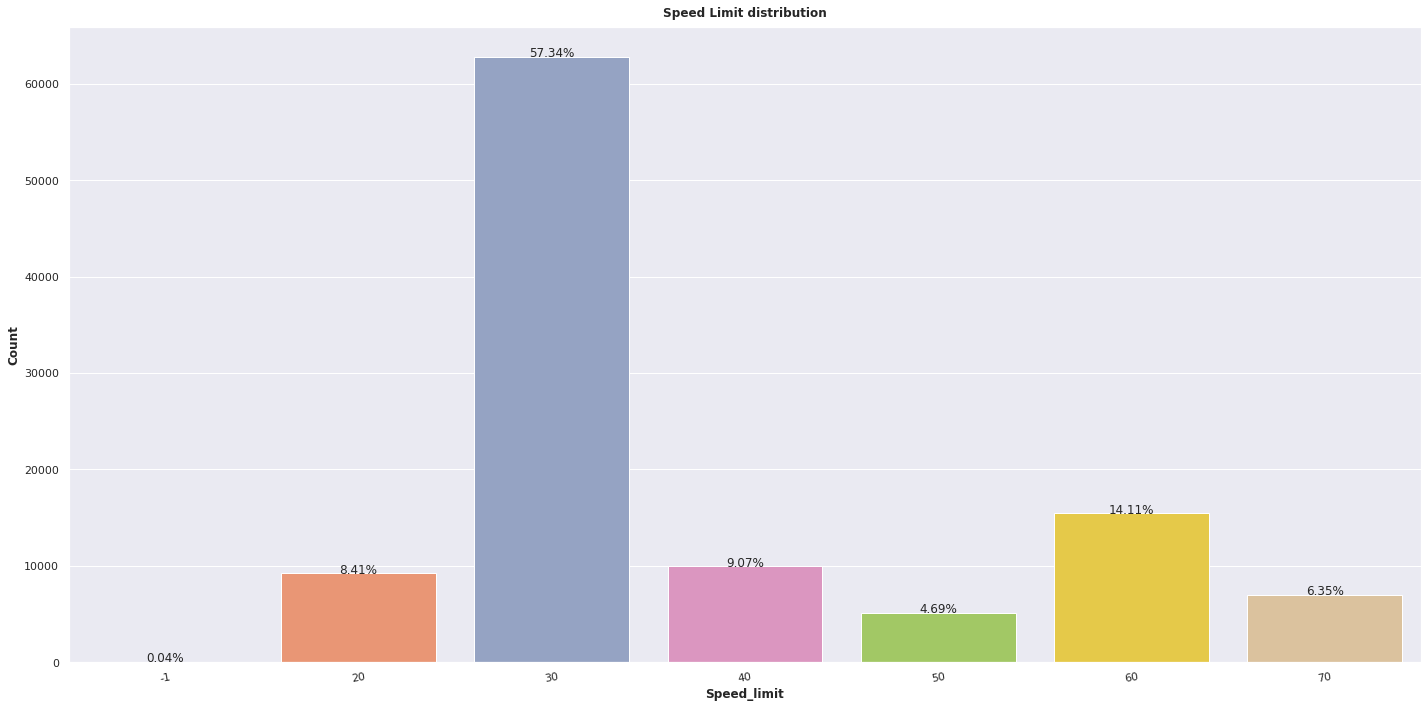

In [343]:
#  Speed limit plot
countplot(df_combined, 'Speed_limit', 'Speed Limit')

**H**

In [157]:
# Function to change Age of Driver value to groups
def map_age(age):
    if age == 1:
        return '0-5'
    elif age == 2:
        return '6-10'
    elif age == 3:
        return '11-15'
    elif age == 4:
        return '16-20'
    elif age == 5:
        return '21-25'
    elif age == 6:
        return '26-35'
    elif age == 7:
        return '36-45'
    elif age == 8:
        return '46-55'
    elif age == 9:
        return '56-65'
    elif age == 10:
        return '66-75'
    elif age == 11:
        return 'over 75'
    elif age == -1:
        return "Don't know"
    

df_combined['Age_Range_of_Driver'] = df_combined['Age_Band_of_Driver'].apply(map_age)

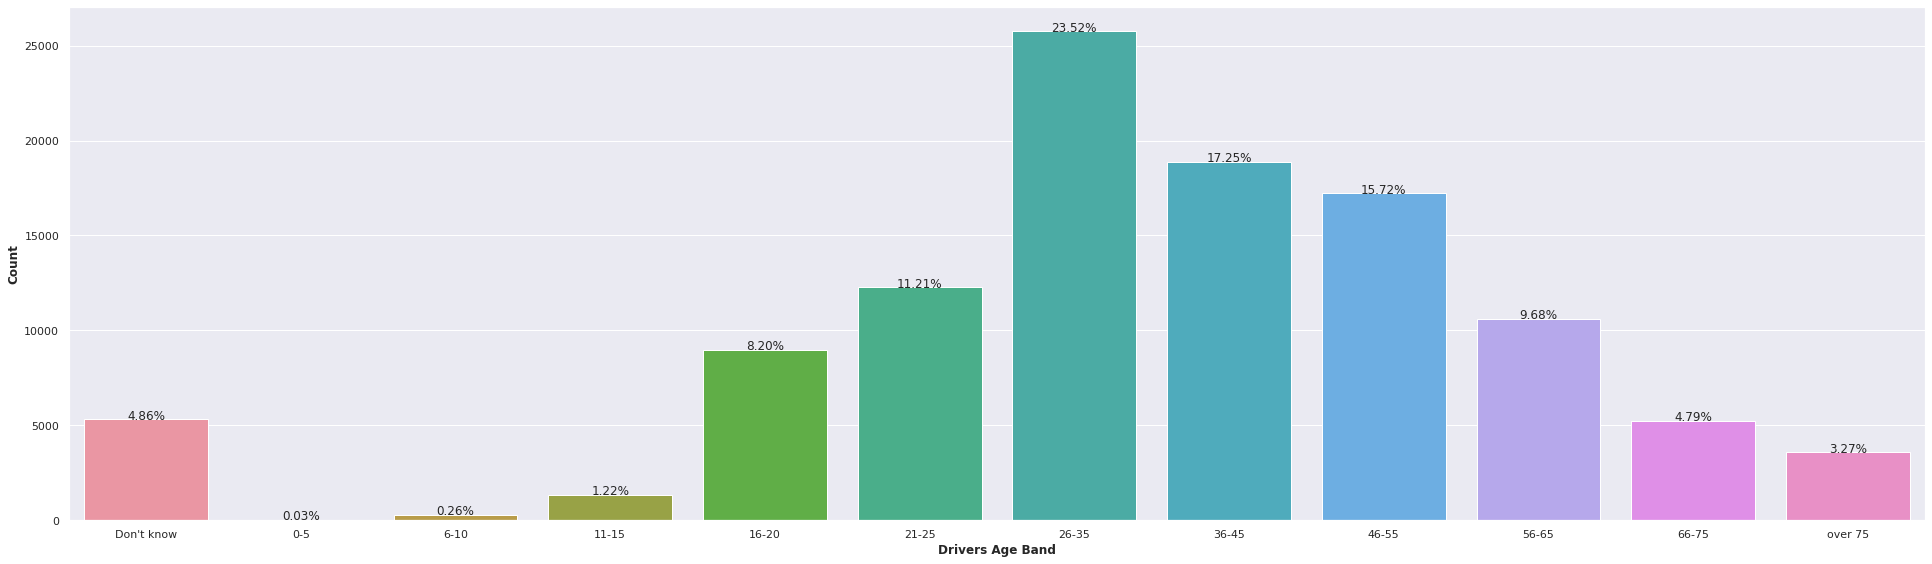

In [345]:
# Plotting Driver Age band
age_order =["Don't know",'0-5','6-10','11-15','16-20','21-25','26-35','36-45','46-55','56-65','66-75','over 75']
sns.set(style="darkgrid")
plt.figure(figsize=(27,8))
weatherplot = sns.countplot(x='Age_Range_of_Driver',data=df_combined, order = age_order )
weatherplot.set(xlabel='Drivers Age Band', ylabel='Count')
for p in weatherplot.patches: 
    height = p.get_height() 
    weatherplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
plt.show()

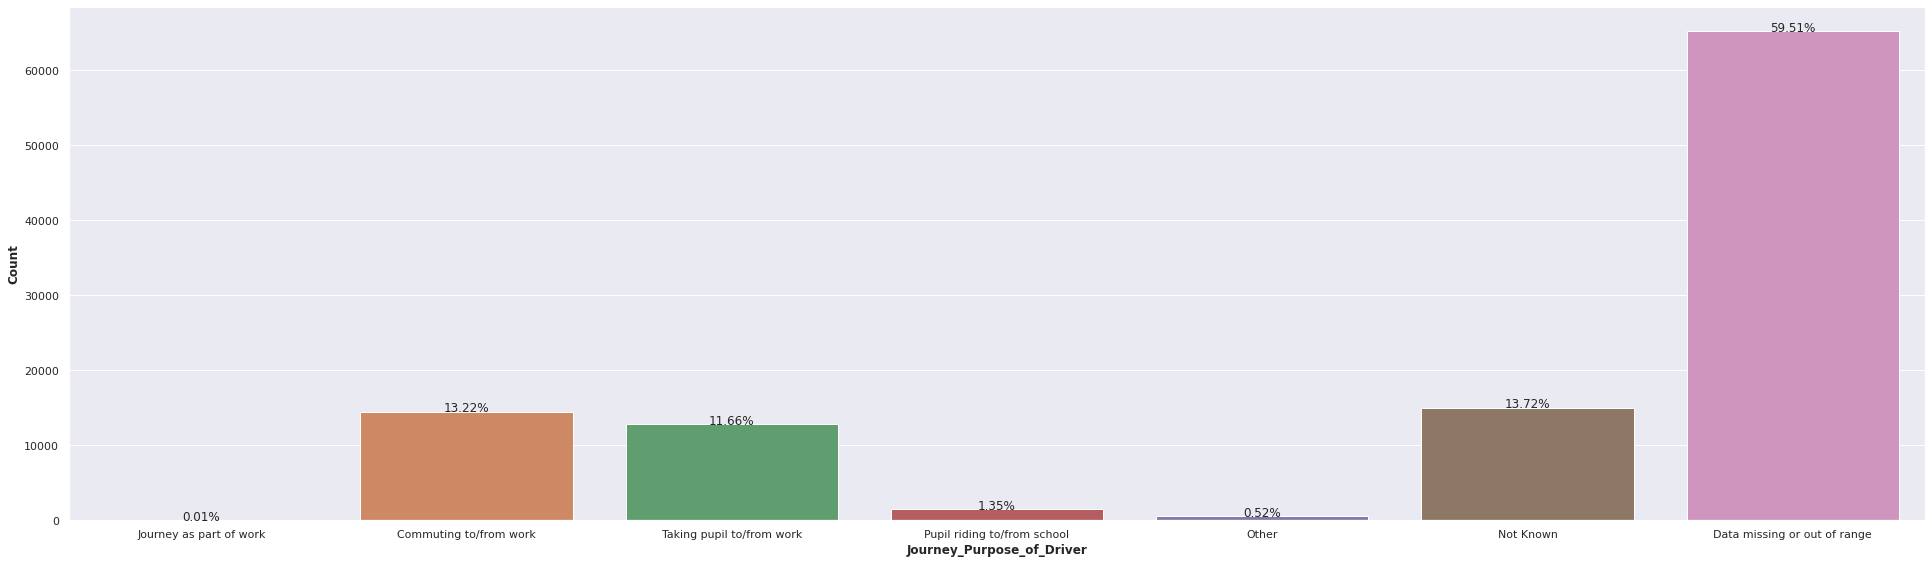

In [346]:
# Plotting purpose of journey
age_order =["Don't know",'0-5','6-10','11-15','16-20','21-25','26-35','36-45','46-55','56-65','66-75','over 75']
sns.set(style="darkgrid")
plt.figure(figsize=(27,8))
weatherplot = sns.countplot(x='Journey_Purpose_of_Driver',data=df_combined )
weatherplot.set(xlabel='Journey_Purpose_of_Driver', ylabel='Count' , xticklabels=['Journey as part of work','Commuting to/from work','Taking pupil to/from work', 'Pupil riding to/from school','Other','Not Known','Data missing or out of range'])
for p in weatherplot.patches: 
    height = p.get_height() 
    weatherplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
plt.show()


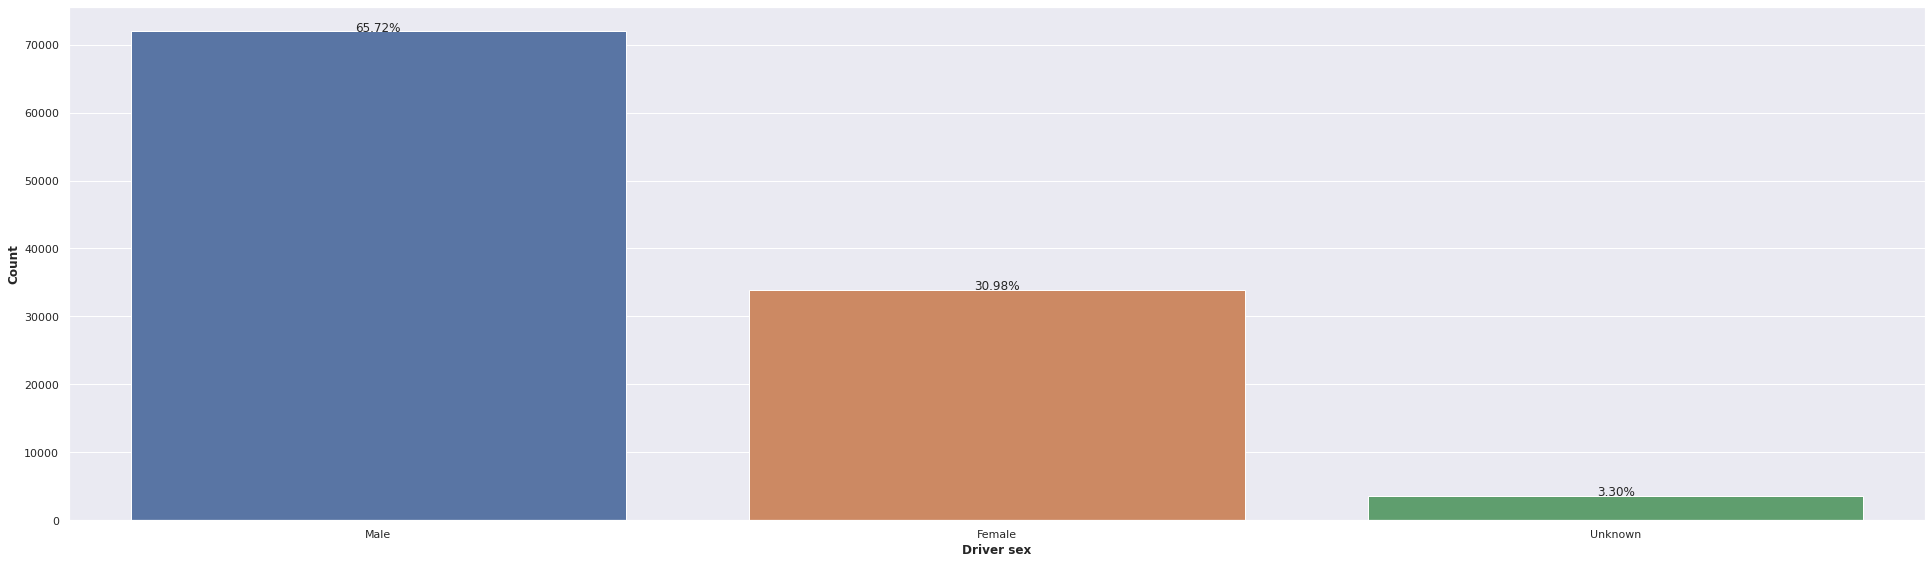

In [347]:
# Plotting  driver sex
sns.set(style="darkgrid")
plt.figure(figsize=(27,8))
weatherplot = sns.countplot(x='Sex_of_Driver',data=df_combined )
weatherplot.set(xlabel='Driver sex', ylabel='Count' , xticklabels=['Male','Female','Unknown'])
for p in weatherplot.patches: 
    height = p.get_height() 
    weatherplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
plt.show()

In [129]:
male = df_combined[df_combined['Sex_of_Driver'] == 1] 
female = df_combined[df_combined['Sex_of_Driver'] == 2]



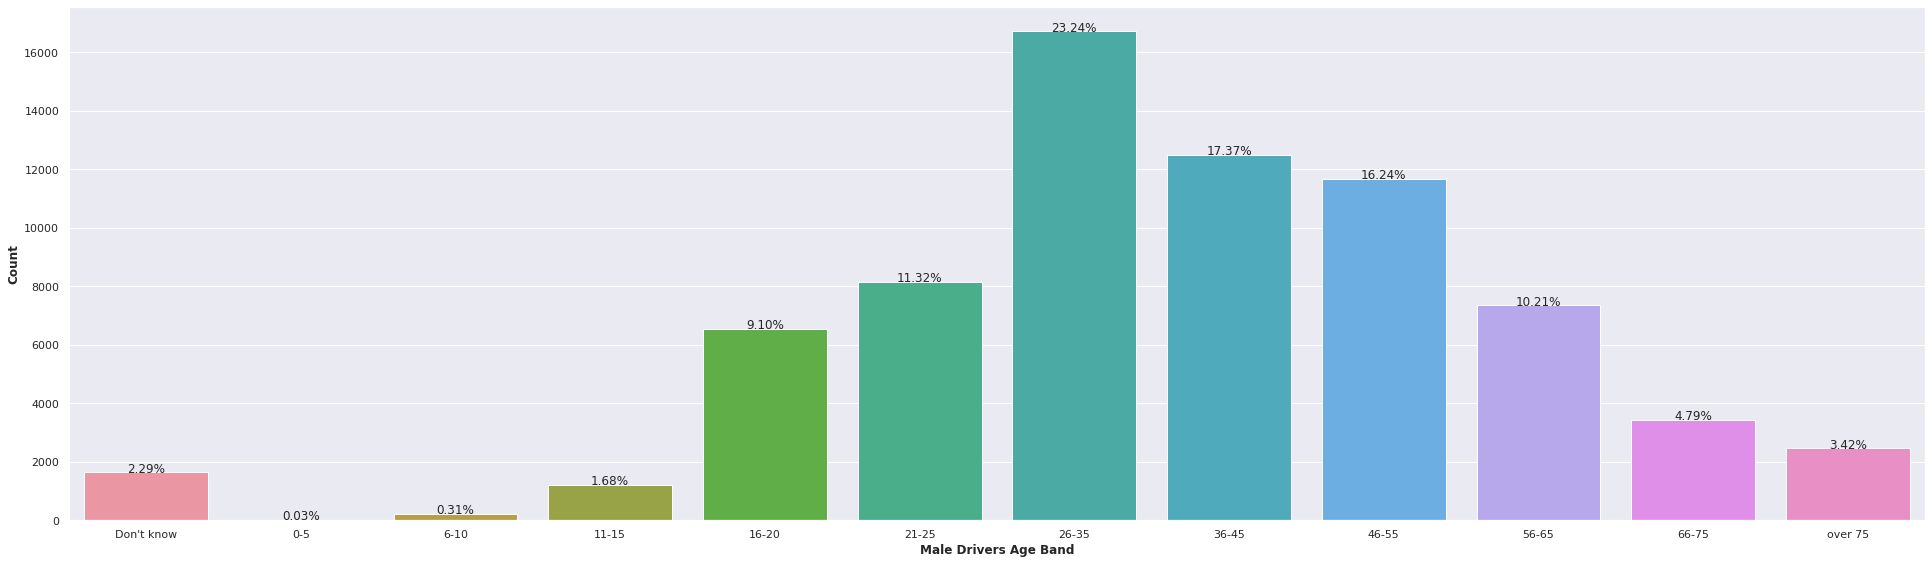

In [349]:
# Plotting Male Driver Age band
acc_time = male
age_order =["Don't know",'0-5','6-10','11-15','16-20','21-25','26-35','36-45','46-55','56-65','66-75','over 75']
sns.set(style="darkgrid")
plt.figure(figsize=(27,8))
weatherplot = sns.countplot(x='Age_Range_of_Driver',data=male, order = age_order )
weatherplot.set(xlabel='Male Drivers Age Band', ylabel='Count')
for p in weatherplot.patches: 
    height = p.get_height() 
    weatherplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
plt.show()

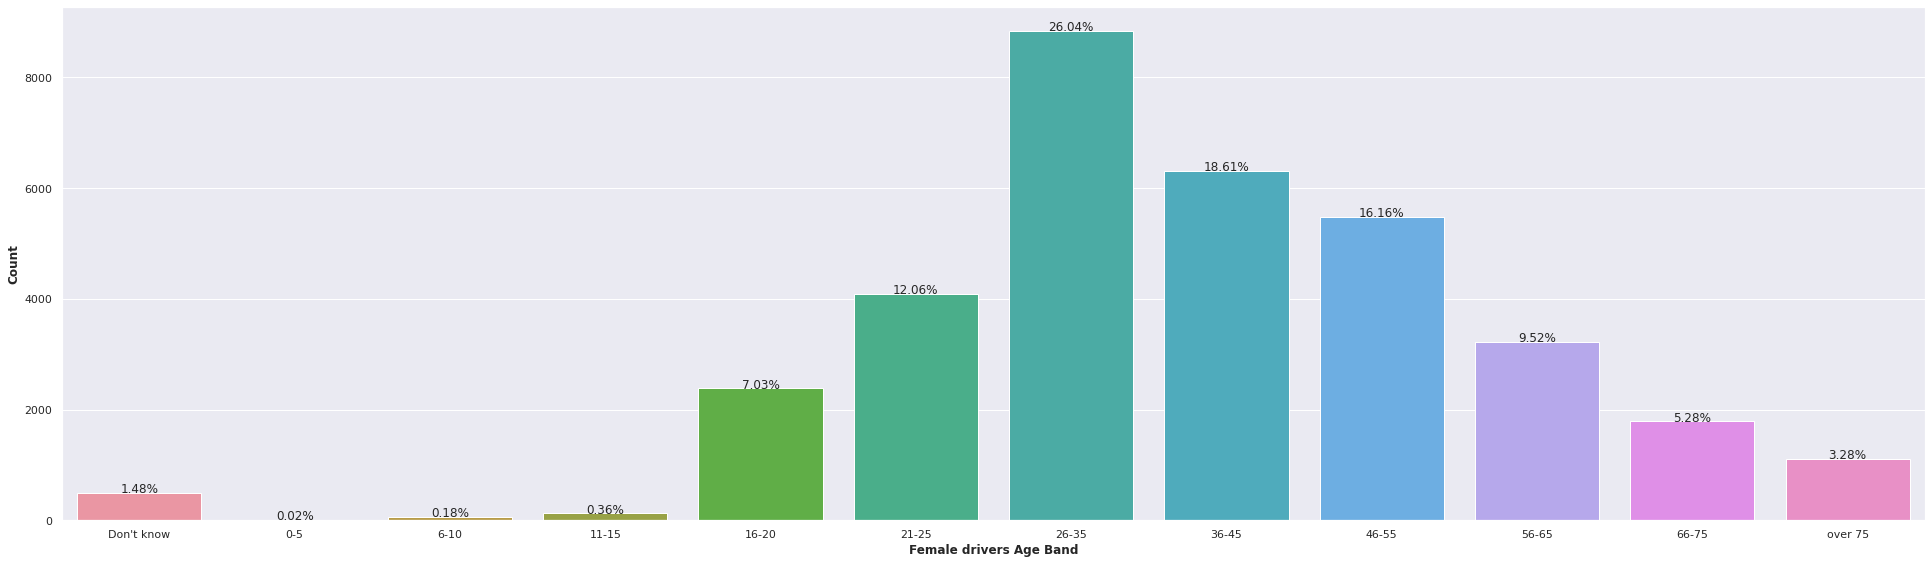

In [350]:
# Plotting Female Driver Age band
acc_time = female
age_order =["Don't know",'0-5','6-10','11-15','16-20','21-25','26-35','36-45','46-55','56-65','66-75','over 75']
sns.set(style="darkgrid")
plt.figure(figsize=(27,8))
weatherplot = sns.countplot(x='Age_Range_of_Driver',data=female, order = age_order )
weatherplot.set(xlabel='Female drivers Age Band', ylabel='Count')
for p in weatherplot.patches: 
    height = p.get_height() 
    weatherplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(female))*100)+'%',  
      ha="center") 
plt.show()

**I**

**Feature Engineering**

In [158]:
# Grouping our combined dataframe into feature and target
y = df_combined['Accident_Severity']
X = df_combined.drop('Accident_Severity', axis=1)
X = X.drop(['Accident_Index','Casualty_Severity','Vehicle_age_classification' ,'NewTime','Age_Range_of_Driver','Hand_drive','engine_capacity_grouping', 'Day','Location_Easting_OSGR', 'Weather_state', 'Vehicle_classification','Location_Northing_OSGR','LSOA_of_Accident_Location', 'Hour','Time','Date','Longitude','Latitude','Local_Authority_(Highway)','Weather_state',	'Hand_drive'], axis = 1)
X.shape

(109518, 58)

In [159]:
# Splitting our dataset
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [160]:
# Training our data set
sel = RandomForestClassifier(n_estimators = 100)
sel.fit(X_train, y_train)

RandomForestClassifier()

In [161]:
# checking accuracy of our trained dataset
y_pred = sel.predict(X_test)
accuracy_score(y_test, y_pred)

0.818708911614317

In [162]:
# Selecting best features
features = []
value = []
for k,v in sorted(zip(sel.feature_importances_, X_train.columns), reverse = True):
  features.append(v)
  print(f'{v}: {k}')
  value.append(k)

Local_Authority_(District): 0.05461013418732156
Week_of_year: 0.05173555655026044
Age_of_Casualty: 0.045384652907400846
Age_of_Driver: 0.04473766715167433
1st_Road_Number: 0.041852304854136484
Police_Force: 0.040034868822891735
Engine_Capacity_(CC): 0.039726194610582646
Age_of_Vehicle: 0.0345172235836121
Day_of_Week: 0.03084293015515937
Number_of_Casualties: 0.029777328668155367
Vehicle_Manoeuvre: 0.028648869793965574
Casualty_IMD_Decile: 0.028335852351700684
Driver_IMD_Decile: 0.027165100761845976
Vehicle_IMD_Decile: 0.026975418004794183
Age_Band_of_Casualty: 0.023040316719788123
Age_Band_of_Driver: 0.02200191269219253
1st_Point_of_Impact: 0.021003253752856634
Speed_limit: 0.020844564577232914
Vehicle_Type: 0.019010043963459195
Casualty_Type: 0.019000434286665657
Journey_Purpose_of_Driver: 0.017454322803317955
Junction_Detail: 0.016819569315054555
1st_Road_Class: 0.016273363863748065
Number_of_Vehicles: 0.016121176729245613
Junction_Location: 0.015785178591895408
Vehicle_Leaving_Carri

In [163]:
# Percatange imporatnce of chossen features
sum(value[:25])

0.731698239698958

In [164]:
# Selecting first 25 features
X_features = features[:25]
X_features

['Local_Authority_(District)',
 'Week_of_year',
 'Age_of_Casualty',
 'Age_of_Driver',
 '1st_Road_Number',
 'Police_Force',
 'Engine_Capacity_(CC)',
 'Age_of_Vehicle',
 'Day_of_Week',
 'Number_of_Casualties',
 'Vehicle_Manoeuvre',
 'Casualty_IMD_Decile',
 'Driver_IMD_Decile',
 'Vehicle_IMD_Decile',
 'Age_Band_of_Casualty',
 'Age_Band_of_Driver',
 '1st_Point_of_Impact',
 'Speed_limit',
 'Vehicle_Type',
 'Casualty_Type',
 'Journey_Purpose_of_Driver',
 'Junction_Detail',
 '1st_Road_Class',
 'Number_of_Vehicles',
 'Junction_Location']

In [165]:
X_features = X[features] 

**Smoting**

3    83921
2    23382
1     2215
Name: Accident_Severity, dtype: int64

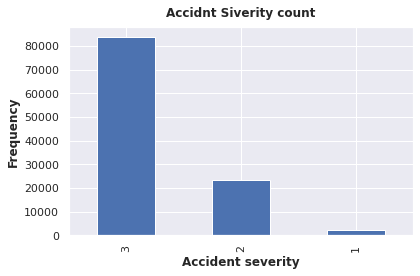

In [79]:
pd.value_counts(y).plot.bar()
plt.title('Accidnt Siverity count')
plt.xlabel('Accident severity')
plt.ylabel('Frequency')
y.value_counts()

In [80]:
# Smoting of features and targets
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==2)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==3)))

sm = SMOTE(random_state=3)
X_smote, y_smote = sm.fit_resample(X_features, y)

print('After OverSampling, the shape of train_X: {}'.format(X_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_smote==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_smote==2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_smote==3)))

Before OverSampling, counts of label '1': 58808
Before OverSampling, counts of label '0': 58685 

Before OverSampling, counts of label '0': 58741 

After OverSampling, the shape of train_X: (251763, 25)
After OverSampling, the shape of train_y: (251763,) 

After OverSampling, counts of label '1': 83921
After OverSampling, counts of label '2': 83921
After OverSampling, counts of label '3': 83921


In [81]:
# Spliting the the smote data into training amnd testing data


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0, shuffle=True)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (176234, 25)
Number transactions y_train dataset:  (176234,)
Number transactions X_test dataset:  (75529, 25)
Number transactions y_test dataset:  (75529,)


In [82]:
# Training our data with models
models = { 'Decision_Tree': tree.DecisionTreeClassifier(), 'RandomForest': RandomForestClassifier(), 'Naive_bayes': GaussianNB(), 'Adaboost':AdaBoostClassifier(), 'Logistic Regression':LogisticRegression()}

In [110]:
# Function used to train our models
def evaluate_model(models, X, y,X_train_res):
  for k, v in models.items():
    clf = v
    clf = clf.fit(X, y)
    y_pred = clf.predict(X_train_res)
    scores = accuracy_score(y_test, y_pred)
    target_names = [1,2,3]
    print(f'Accuracy of {k} = {scores}')
    print(classification_report(y_test, y_pred))

In [111]:
evaluate_model(models, X_train, y_train, X_test)

Accuracy of Decision_Tree = 0.8205325106912577
              precision    recall  f1-score   support

           1       0.91      0.95      0.93     25113
           2       0.75      0.75      0.75     25236
           3       0.80      0.76      0.78     25180

    accuracy                           0.82     75529
   macro avg       0.82      0.82      0.82     75529
weighted avg       0.82      0.82      0.82     75529

Accuracy of RandomForest = 0.9096505977836328
              precision    recall  f1-score   support

           1       0.97      0.99      0.98     25113
           2       0.88      0.85      0.87     25236
           3       0.87      0.89      0.88     25180

    accuracy                           0.91     75529
   macro avg       0.91      0.91      0.91     75529
weighted avg       0.91      0.91      0.91     75529

Accuracy of Naive_bayes = 0.5111149359848535
              precision    recall  f1-score   support

           1       0.59      0.61      0.60  

In [ ]:
#boxplot
# Compare Algorithms
fig = plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [112]:
# Defining a function for stacking.
from sklearn.ensemble import StackingClassifier
def get_stacking():
    level0 = list()
    level0.append(('dtree', tree.DecisionTreeClassifier()))
    level0.append(('AbC', AdaBoostClassifier()))
    level0.append(('lr', LogisticRegression()))
    level0.append(('bayes', GaussianNB()))
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

def get_dataset():
    X_train, X_validation, y_train, y_validation = train_test_split(X_features,y,test_size=.25,random_state=1)
    return X_train, y_train

# Getting the models required after adding stacking
def get_models():
    models = {}
    models['dtree'] = tree.DecisionTreeClassifier(criterion='gini', max_depth=42, min_samples_leaf=1, random_state=42)
    models['Abc'] = AdaBoostClassifier()
    models['GaussianNB'] = GaussianNB()
    models['Logistic'] = LogisticRegression(random_state=42)
    models['Stacking Models'] = get_stacking()
    return models



# Defining the probability dictionary
classifier_probability2 = {}
t_result = []
gnb_stack_result_dict = {}

#Grab hold of the dataset.
X, y = get_dataset()

#Grab the models to use.
models = get_models()

# Function to evaluate the models
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1,
    error_score='raise')
    train_result = model.fit(X,y)
    return scores, train_result
# Defining the probability dictionary
classifier_probability2 = {}
t_result = []
gnb_stack_result_dict = {}

#Run and Evaluate the models.
results, names = list(), list()
for name, model in models.items():
    scores, train_result = evaluate_model(model, X_train, y_train)
    results.append(scores)
    t_result.append(train_result)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
   
    classifier_probability2[model] = model.predict_proba(X_train)
    gnb_stack_result_dict[name] = np.mean(scores)

>dtree 0.816 (0.003)
>Abc 0.642 (0.004)
>GaussianNB 0.513 (0.004)
>Logistic 0.492 (0.005)
>Stacking Models 0.821 (0.003)


**Comaparing my model with government model**

In [166]:
#model
model = RandomForestClassifier()
model.fit(X_features, y)
#predictions 1 or 0
y_predictions = model.predict(X_features)
#predictions in probalities
y_pred_proba = model.predict_proba(X_features)[: ][: , 1]

In [167]:
df_combined['Slight Probality Pred'] = y_pred_proba
df_combined['Serious Probality Pred'] = 1 - y_pred_proba

In [173]:
df_combined['Prediction'] = df_combined['Accident_Index'].astype(str) + df_combined['Vehicle_Reference'].astype(str) + df_combined['Casualty_Reference'].astype(str)
df_combined['Prediction'] = df_combined['Prediction'].astype(str)

In [174]:
# Reading in government model prediction for comparison with my ddel
df_cas = pd.read_csv('/content/drive/My Drive/cas_adjustment_lookup_2019.csv')


In [176]:
df_cas['Prediction'] = df_cas['accident_index'].astype(str) + df_cas['Vehicle_Reference'].astype(str) + df_cas['Casualty_Reference'].astype(str)
df_cas['Prediction'] = df_cas['Prediction'].astype(str)

In [177]:
df_fused = df_combined.merge(df_cas, on='Prediction')

In [178]:
#predicting 
np.sqrt(mean_squared_error(df_fused['Slight Probality Pred'],df_fused['Adjusted_Slight']))

0.8553533845064911